In [1]:
from subpred.protein_go_datasets import get_transmembrane_transporter_dataset, get_stats, get_interpro_annotations

Same notebook, but with automatic outlier removal to see impact on training scores.

## Parameters

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 100)

In [3]:
ORGANISMS = [3702]  # athaliana 3702 yeast 559292 human 9606 ecoli 83333
GO_TERMS_CLASSES = [
    "sugar transmembrane transporter activity",
    "amino acid transmembrane transporter activity",
]
IDENTITY_THRESHOLD = 70
TEST_NAME = "svc_at_sugaramino_outlier_removal"
# TODO pathlib
FEATURES_FOLDER = "../data/tmp_data/"  # to share between environments
RESULTS_FOLDER = "../data/results/"
RECALCULATE_RESULTS = True  # If false, use cached results, e.g. to create more plots

## Full dataset

In [4]:
# Get full dataset for stats. Dataset for analysis is created in cell below.
dataset_unfiltered = get_transmembrane_transporter_dataset(
    organism_ids=ORGANISMS,
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
get_stats(*dataset_unfiltered)

cd-hit: clustered 1773 sequences into 646 clusters at threshold 50
cd-hit: clustered 1773 sequences into 923 clusters at threshold 70
cd-hit: clustered 1773 sequences into 1203 clusters at threshold 90
cd-hit: clustered 1773 sequences into 1554 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                   
False              False         computational protein_level              100                      3   
                                                                          None                     3   
                                               transcript_level           50                       3   
                                                                          70                       4   
                                                                          90                       7   
                                                                          100                     37   
                                                                          None                    49   
                   True          computational protein_level              50                      87   
                                                                          70                     114   
                                                                          90                     153   
                                                                          100                    329   
                                                                          None                   433   
                                               transcript_level           50                       7   
                                                                          70                      13   
                                                                          90                      19   
                                                                          100                     84   
                                                                          None                   164   
                                 experiment    protein_level              50                      25   
                                                                          70                      33   
                                                                          90                      38   
                                                                          100                     41   
                                                                          None                    42   
                                               transcript_level           50                       3   
                                                                          70                       5   
                                                                          90                       5   
                                                                          100                      6   
                                                                          None                     6   
True               True          computational protein_level              50                     206   
                                                                          70                     287   
                                                                          90                     370   
                                                                          100                    408   
                                                                          None                   418   
                                               transcript_level           50                     208   
                                                                          70                     338   
                                                                          90                     462   
                                                                          100                    492   
                                                                          None                   504   
                              

## Filtered Subset

In [5]:
dataset_organism = get_transmembrane_transporter_dataset(  # organism
    organism_ids=ORGANISMS,
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
get_stats(*dataset_organism)

cd-hit: clustered 420 sequences into 276 clusters at threshold 50
cd-hit: clustered 420 sequences into 344 clusters at threshold 70
cd-hit: clustered 420 sequences into 403 clusters at threshold 90
cd-hit: clustered 420 sequences into 419 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering                   
True               True          experiment  protein_level              50                     276   
                                                                        70                     344   
                                                                        90                     403   
                                                                        100                    419   
                                                                        None                   420   

                                                                                    n_terms  
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering           
True               True          experiment  protein_level              50              264  
                                                                        70              281  
                                                                        90              288  
                                                                        100             288  
                                                                        None            288

## Sugar/Amino subset

In [6]:
from subpred.dataset_filters import get_classification_subset

dataset_organism = get_classification_subset(
    dataset_full=dataset_organism, go_terms=GO_TERMS_CLASSES
)

print("before clustering:")
dataset_organism[1].go_term_ancestor.value_counts()

before clustering:


go_term_ancestor
amino acid transmembrane transporter activity    33
sugar transmembrane transporter activity         32
Name: count, dtype: int64

In [7]:
from subpred.dataset_filters import filter_no_3Di_available

dataset_organism = filter_no_3Di_available(dataset_organism)
dataset_organism[1].go_term_ancestor.value_counts()

go_term_ancestor
amino acid transmembrane transporter activity    33
sugar transmembrane transporter activity         32
Name: count, dtype: int64

Clustering at 70%

In [8]:
from subpred.dataset_filters import cluster_sequences

dataset_organism = cluster_sequences(
    dataset_full=dataset_organism, identity_threshold=IDENTITY_THRESHOLD
)
dataset_organism[1].go_term_ancestor.value_counts()

cd-hit: clustered 65 sequences into 54 clusters at threshold 70


go_term_ancestor
sugar transmembrane transporter activity         28
amino acid transmembrane transporter activity    26
Name: count, dtype: int64

### Interpro annotations

In [9]:
from subpred.protein_go_datasets import count_interpro_annotations, get_interpro_table

count_interpro_annotations(dataset_organism[1], GO_TERMS_CLASSES)

######## sugar transmembrane transporter activity ########
Family
Sugar transporter SWEET                                      13
Sugar/inositol transporter                                   12
Major facilitator, sugar transporter-like                    12
Sugar transport protein STP/Polyol transporter PLT, plant     8
Sugar transport protein STP/MST-like, plant                   7
Major Facilitator Superfamily Trehalose Transporter           2
Sugar transporter ERD6/Tret1-like                             2
Major Facilitator Superfamily Sugar Transporter               2
Major facilitator superfamily                                 2
Solute carrier family 17 member 9-like                        1
Major Facilitator Superfamily Sodium/Anion Cotransporter      1
Polyol transporter 1-6                                        1
Triose Phosphate/Phosphate Translocator                       1
Sucrose/H+ symporter, plant                                   1
Name: count, dtype: int64

Domain
Majo

In [10]:
# Some proteins have multiple rows!
get_interpro_table(
    *dataset_organism,
    go_terms=["sugar transmembrane transporter activity"],
    interpro_types=["Family", "Homologous_superfamily"]
)

,Uniprot,go_term_ancestor,protein_names,Family,Homologous_superfamily
0,O04036,sugar transmembrane transporter activity,Sugar transporter ERD6 (Early-responsive to de...,Sugar/inositol transporter,MFS transporter superfamily
1,O04036,sugar transmembrane transporter activity,Sugar transporter ERD6 (Early-responsive to de...,Major Facilitator Superfamily Trehalose Transp...,MFS transporter superfamily
2,O04036,sugar transmembrane transporter activity,Sugar transporter ERD6 (Early-responsive to de...,"Major facilitator, sugar transporter-like",MFS transporter superfamily
3,O04036,sugar transmembrane transporter activity,Sugar transporter ERD6 (Early-responsive to de...,Sugar transporter ERD6/Tret1-like,MFS transporter superfamily
4,O04249,sugar transmembrane transporter activity,Sugar transport protein 7 (Hexose transporter 7),Sugar transport protein STP/Polyol transporter...,MFS transporter superfamily
5,O04249,sugar transmembrane transporter activity,Sugar transport protein 7 (Hexose transporter 7),Sugar/inositol transporter,MFS transporter superfamily
6,O04249,sugar transmembrane transporter activity,Sugar transport protein 7 (Hexose transporter 7),"Sugar transport protein STP/MST-like, plant",MFS transporter superfamily
7,O04249,sugar transmembrane transporter activity,Sugar transport protein 7 (Hexose transporter 7),"Major facilitator, sugar transporter-like",MFS transporter superfamily
8,P23586,sugar transmembrane transporter activity,Sugar transport protein 1 (Glucose transporter...,"Sugar transport protein STP/MST-like, plant",MFS transporter superfamily
9,P23586,sugar transmembrane transporter activity,Sugar transport protein 1 (Glucose transporter...,"Major facilitator, sugar transporter-like",MFS transporter superfamily


In [11]:
# Some proteins have multiple rows!
get_interpro_table(
    *dataset_organism,
    go_terms=["amino acid transmembrane transporter activity"],
    interpro_types=["Family", "Homologous_superfamily", "Domain"]
)

,Uniprot,go_term_ancestor,protein_names,Family,Homologous_superfamily,Domain
0,F4HW02,amino acid transmembrane transporter activity,GABA transporter 1 (AtGAT1) (Bidirectional ami...,NaN,NaN,"Amino acid transporter, transmembrane domain"
1,F4IUW3,amino acid transmembrane transporter activity,Amino acid transporter AVT1C (AtAvt1C),NaN,NaN,"Amino acid transporter, transmembrane domain"
2,O64759,amino acid transmembrane transporter activity,Cationic amino acid transporter 5,Amino acid/polyamine transporter I,NaN,"Cationic amino acid transporter, C-terminal"
3,O81845,amino acid transmembrane transporter activity,Mitochondrial uncoupling protein 1 (AtPUMP1),Mitochondrial carrier protein,Mitochondrial carrier domain superfamily,NaN
4,O81845,amino acid transmembrane transporter activity,Mitochondrial uncoupling protein 1 (AtPUMP1),Mitochondrial Metabolite Transporter,Mitochondrial carrier domain superfamily,NaN
5,P57758,amino acid transmembrane transporter activity,Cystinosin homolog,Lysosomal cystine transporter,NaN,NaN
6,P92961,amino acid transmembrane transporter activity,Proline transporter 1 (AtPROT1),NaN,NaN,"Amino acid transporter, transmembrane domain"
7,Q38967,amino acid transmembrane transporter activity,Amino acid permease 2 (Amino acid transporter ...,NaN,NaN,"Amino acid transporter, transmembrane domain"
8,Q42400,amino acid transmembrane transporter activity,Amino acid permease 1 (Amino acid transporter ...,NaN,NaN,"Amino acid transporter, transmembrane domain"
9,Q84MA5,amino acid transmembrane transporter activity,Cationic amino acid transporter 1 (Amino acid ...,Amino acid/polyamine transporter I,NaN,"Cationic amino acid transporter, C-terminal"


Issue: GO:0004970 is connected directly to GO:0015171, but that does not make sense.



## Feature generation

In [12]:
from subpred.features import get_features

features_list, series_labels = get_features(dataset_full=dataset_organism)

2025-06-01 23:11:09.083822: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-01 23:11:09.089758: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748812269.095596  128595 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748812269.097552  128595 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-01 23:11:09.104832: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

For each Feature: Outlier detection, numpy conversion 

In [13]:
from subpred.features import get_ml_datasets

ml_datasets = list(
    get_ml_datasets(features_list=features_list, series_labels=series_labels)
)
ml_datasets

[Name: DUMMY, Features: 1024, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: AAC, Features: 20, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: PAAC, Features: 400, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: AA_KMER3, Features: 8000, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_COMP, Features: 20, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_KMER2, Features: 400, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_KMER

## Outliers

In [14]:
from subpred.evaluation import outlier_check
print(len(ml_datasets))
df_outliers = outlier_check(dataset_full=dataset_organism, ml_datasets=ml_datasets, threshold=0.5)
# df_outliers[df_outliers.outlier_count>df_outliers.outlier_count.quantile(0.95)]
df_outliers

20


,outlier_count,protein_names,go_term_ancestor
Uniprot,,,
Q9ZV24,12,"Outer envelope pore protein 16-1, chloroplasti...",amino acid transmembrane transporter activity
Q9C8E7,10,Glutamate receptor 3.3 (AtGLR3.3) (Glutamate r...,amino acid transmembrane transporter activity
P57758,10,Cystinosin homolog,amino acid transmembrane transporter activity


#### Automatic outlier removal

In [15]:
# they were found with the outliers_check function below
potential_outliers = df_outliers.index.tolist()
dataset_organism = (
    dataset_organism[0][~(dataset_organism[0].index.isin(potential_outliers))],
    dataset_organism[1][~(dataset_organism[1].index.isin(potential_outliers))],
)
dataset_organism[1].go_term_ancestor.value_counts()

go_term_ancestor
sugar transmembrane transporter activity         28
amino acid transmembrane transporter activity    23
Name: count, dtype: int64

In [16]:
features_list, series_labels = get_features(dataset_full=dataset_organism)
ml_datasets = list(
    get_ml_datasets(features_list=features_list, series_labels=series_labels)
)
ml_datasets

[Name: DUMMY, Features: 1024, Samples: 51, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: AAC, Features: 20, Samples: 51, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: PAAC, Features: 400, Samples: 51, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: AA_KMER3, Features: 8000, Samples: 51, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_COMP, Features: 20, Samples: 51, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_KMER2, Features: 400, Samples: 51, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_KMER

### Saving data for DNNs

In [17]:
# saving as pickle, to load in different notebook with different env,
# as tensorflow on GPU has problems with current CUDA version (too new)
import pickle

with open(f"{FEATURES_FOLDER}{TEST_NAME}_ml_data.pickle", "wb") as handle:
    pickle.dump(ml_datasets, handle)

## Model evaluation SVM

In [18]:
ml_datasets[0]

Name: DUMMY, Features: 1024, Samples: 51, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
 'sugar transmembrane transporter activity'])

In [19]:
from subpred.evaluation import (
    get_svm_results,
    plot_results_long,
    summarize_results_long,
)
from sklearn.metrics import f1_score, make_scorer

scoring_outer = {
    "Balanced Accuracy": "balanced_accuracy",
    "F1 Macro": "f1_macro",
    "F1 Amino Acid": make_scorer(
        f1_score, pos_label=0
    ),  # labels are encoded in lex. order
    "F1 Sugar": make_scorer(f1_score, pos_label=1),
}

df_results_long = get_svm_results(
    ml_datasets=ml_datasets,
    recalculate=RECALCULATE_RESULTS,
    output_folder=RESULTS_FOLDER,
    test_name=TEST_NAME,
    inner_cv=5,
    outer_cv=5,
    repeats=10,
    n_jobs_inner=1,
    n_jobs_outer=-1,
    scoring_inner="balanced_accuracy",
    scoring_outer=scoring_outer,
)
# df_results_long

=== DUMMY ===
Balanced Accuracy: 0.49+-0.13
F1 Macro: 0.46+-0.14
F1 Amino Acid: 0.38+-0.21
F1 Sugar: 0.54+-0.17
=== AAC ===
Balanced Accuracy: 0.76+-0.12
F1 Macro: 0.74+-0.12
F1 Amino Acid: 0.72+-0.14
F1 Sugar: 0.77+-0.13
=== PAAC ===
Balanced Accuracy: 0.90+-0.11
F1 Macro: 0.89+-0.12
F1 Amino Acid: 0.89+-0.13
F1 Sugar: 0.89+-0.12
=== AA_KMER3 ===
Balanced Accuracy: 0.77+-0.12
F1 Macro: 0.76+-0.13
F1 Amino Acid: 0.77+-0.12
F1 Sugar: 0.74+-0.15
=== 3Di_COMP ===
Balanced Accuracy: 0.92+-0.11
F1 Macro: 0.92+-0.11
F1 Amino Acid: 0.91+-0.13
F1 Sugar: 0.93+-0.11
=== 3Di_KMER2 ===
Balanced Accuracy: 0.97+-0.06
F1 Macro: 0.97+-0.06
F1 Amino Acid: 0.97+-0.06
F1 Sugar: 0.97+-0.05
=== 3Di_KMER3 ===
Balanced Accuracy: 0.91+-0.08
F1 Macro: 0.91+-0.08
F1 Amino Acid: 0.90+-0.09
F1 Sugar: 0.92+-0.07
=== COMB_KMER1 ===
Balanced Accuracy: 0.96+-0.07
F1 Macro: 0.96+-0.07
F1 Amino Acid: 0.96+-0.08
F1 Sugar: 0.97+-0.07
=== COMB_KMER2 ===
Balanced Accuracy: 0.92+-0.08
F1 Macro: 0.92+-0.09
F1 Amino Acid: 0.9

In [20]:
summarize_results_long(df_results_long=df_results_long)

Mean    Median      Sdev
Feature     Metric                                         
3Di_COMP    Balanced Accuracy  0.921333  1.000000  0.108342
            F1 Amino Acid      0.905801  1.000000  0.135362
            F1 Macro           0.918934  1.000000  0.116107
            F1 Sugar           0.932067  1.000000  0.113296
3Di_KMER2   Balanced Accuracy  0.970333  1.000000  0.055741
            F1 Amino Acid      0.965830  1.000000  0.064028
            F1 Macro           0.968043  1.000000  0.058908
            F1 Sugar           0.970256  1.000000  0.054423
3Di_KMER3   Balanced Accuracy  0.911500  0.900000  0.080441
            F1 Amino Acid      0.904856  0.909091  0.090955
            F1 Macro           0.912513  0.898990  0.079711
            F1 Sugar           0.920170  0.923077  0.074272
AAC         Balanced Accuracy  0.755333  0.750000  0.120052
            F1 Amino Acid      0.720504  0.727273  0.141280
            F1 Macro           0.743137  0.722611  0.124673
            F1 Sugar           0.765770  0.800000  0.135664
AA_KMER3    Balanced Accuracy  0.772000  0.791667  0.125354
            F1 Amino Acid      0.771327  0.769231  0.122392
            F1 Macro           0.755087  0.791667  0.133077
            F1 Sugar           0.738847  0.750000  0.153258
COMB_KMER1  Balanced Accuracy  0.962500  1.000000  0.069073
            F1 Amino Acid      0.957742  1.000000  0.079678
            F1 Macro           0.961456  1.000000  0.073182
            F1 Sugar           0.965171  1.000000  0.069310
COMB_KMER2  Balanced Accuracy  0.924667  0.916667  0.082889
            F1 Amino Acid      0.919498  0.909091  0.088980
            F1 Macro           0.919851  0.909091  0.088825
            F1 Sugar           0.920204  0.923077  0.092872
COMB_KMER3  Balanced Accuracy  0.911833  0.916667  0.094837
            F1 Amino Acid      0.905799  0.909091  0.102288
            F1 Macro           0.908489  0.898990  0.098305
            F1 Sugar           0.911178  0.909091  0.100251
DUMMY       Balanced Accuracy  0.493000  0.500000  0.127502
            F1 Amino Acid      0.382950  0.400000  0.214302
            F1 Macro           0.463410  0.494949  0.136433
            F1 Sugar           0.543870  0.558442  0.167800
META        Balanced Accuracy  0.827333  0.833333  0.140083
            F1 Amino Acid      0.802380  0.800000  0.164674
            F1 Macro           0.818047  0.801786  0.146890
            F1 Sugar           0.833714  0.833333  0.137996
META_STD    Balanced Accuracy  0.869500  0.908333  0.137721
            F1 Amino Acid      0.844169  0.888889  0.177205
            F1 Macro           0.861707  0.898990  0.144713
            F1 Sugar           0.879245  0.909091  0.119759
PAAC        Balanced Accuracy  0.896333  0.908333  0.114955
            F1 Amino Acid      0.886368  0.909091  0.129722
            F1 Macro           0.887575  0.898990  0.121873
            F1 Sugar           0.888781  0.898990  0.119334
PROSTT5_3DI Balanced Accuracy  0.946167  1.000000  0.065014
            F1 Amino Acid      0.937926  1.000000  0.077714
            F1 Macro           0.946532  1.000000  0.063903
            F1 Sugar           0.955138  1.000000  0.052312
PROSTT5_AA  Balanced Accuracy  0.954667  1.000000  0.054611
            F1 Amino Acid      0.949257  1.000000  0.062046
            F1 Macro           0.953560  1.000000  0.055115
            F1 Sugar           0.957863  1.000000  0.049739
PROTT5_AA   Balanced Accuracy  0.927000  0.908333  0.067607
            F1 Amino Acid      0.916685  0.909091  0.082164
            F1 Macro           0.927698  0.898990  0.065451
            F1 Sugar           0.938711  0.923077  0.052984
PSSM_50_1   Balanced Accuracy  0.710333  0.741667  0.173120
            F1 Amino Acid      0.657492  0.727273  0.234532
            F1 Macro           0.695416  0.722611  0.182328
            F1 Sugar           0.733340  0.750000  0.149370
PSSM_50_3   Balanced Accuracy  0.811833  0.816667  0.131288
            F1 

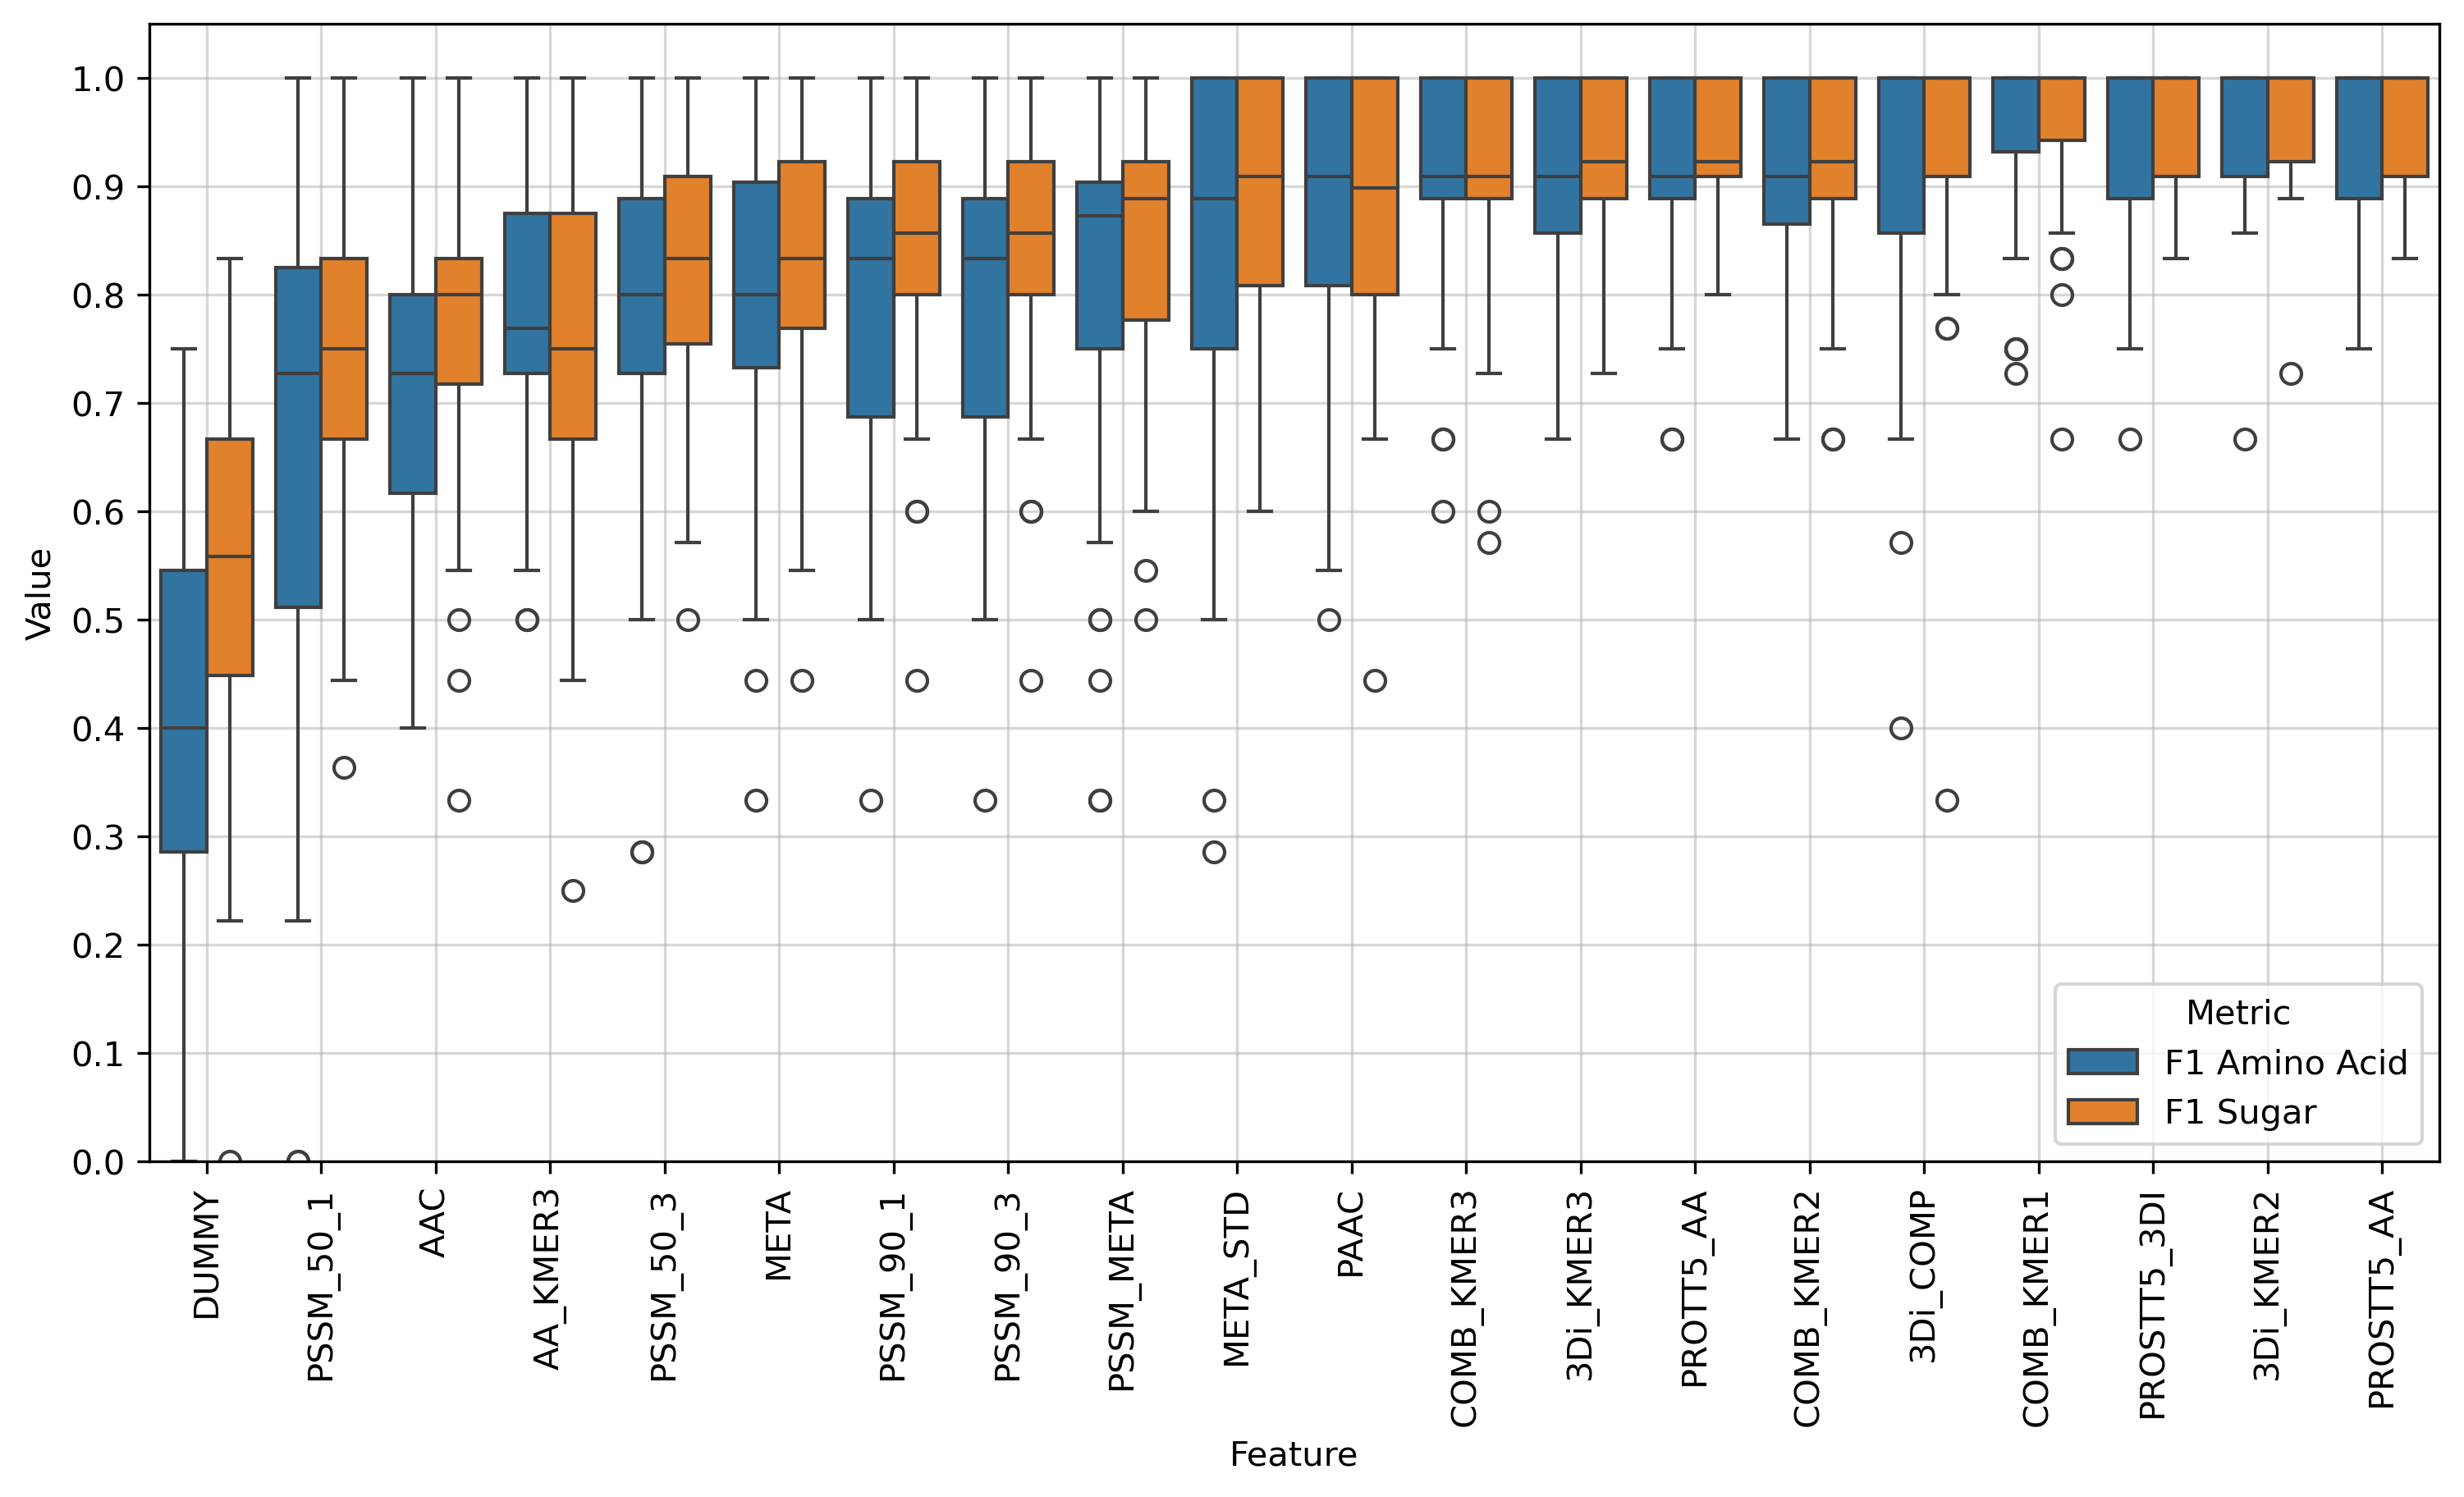

In [21]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include=["F1 Amino Acid", "F1 Sugar"],
    figsize=(12, 6),
)

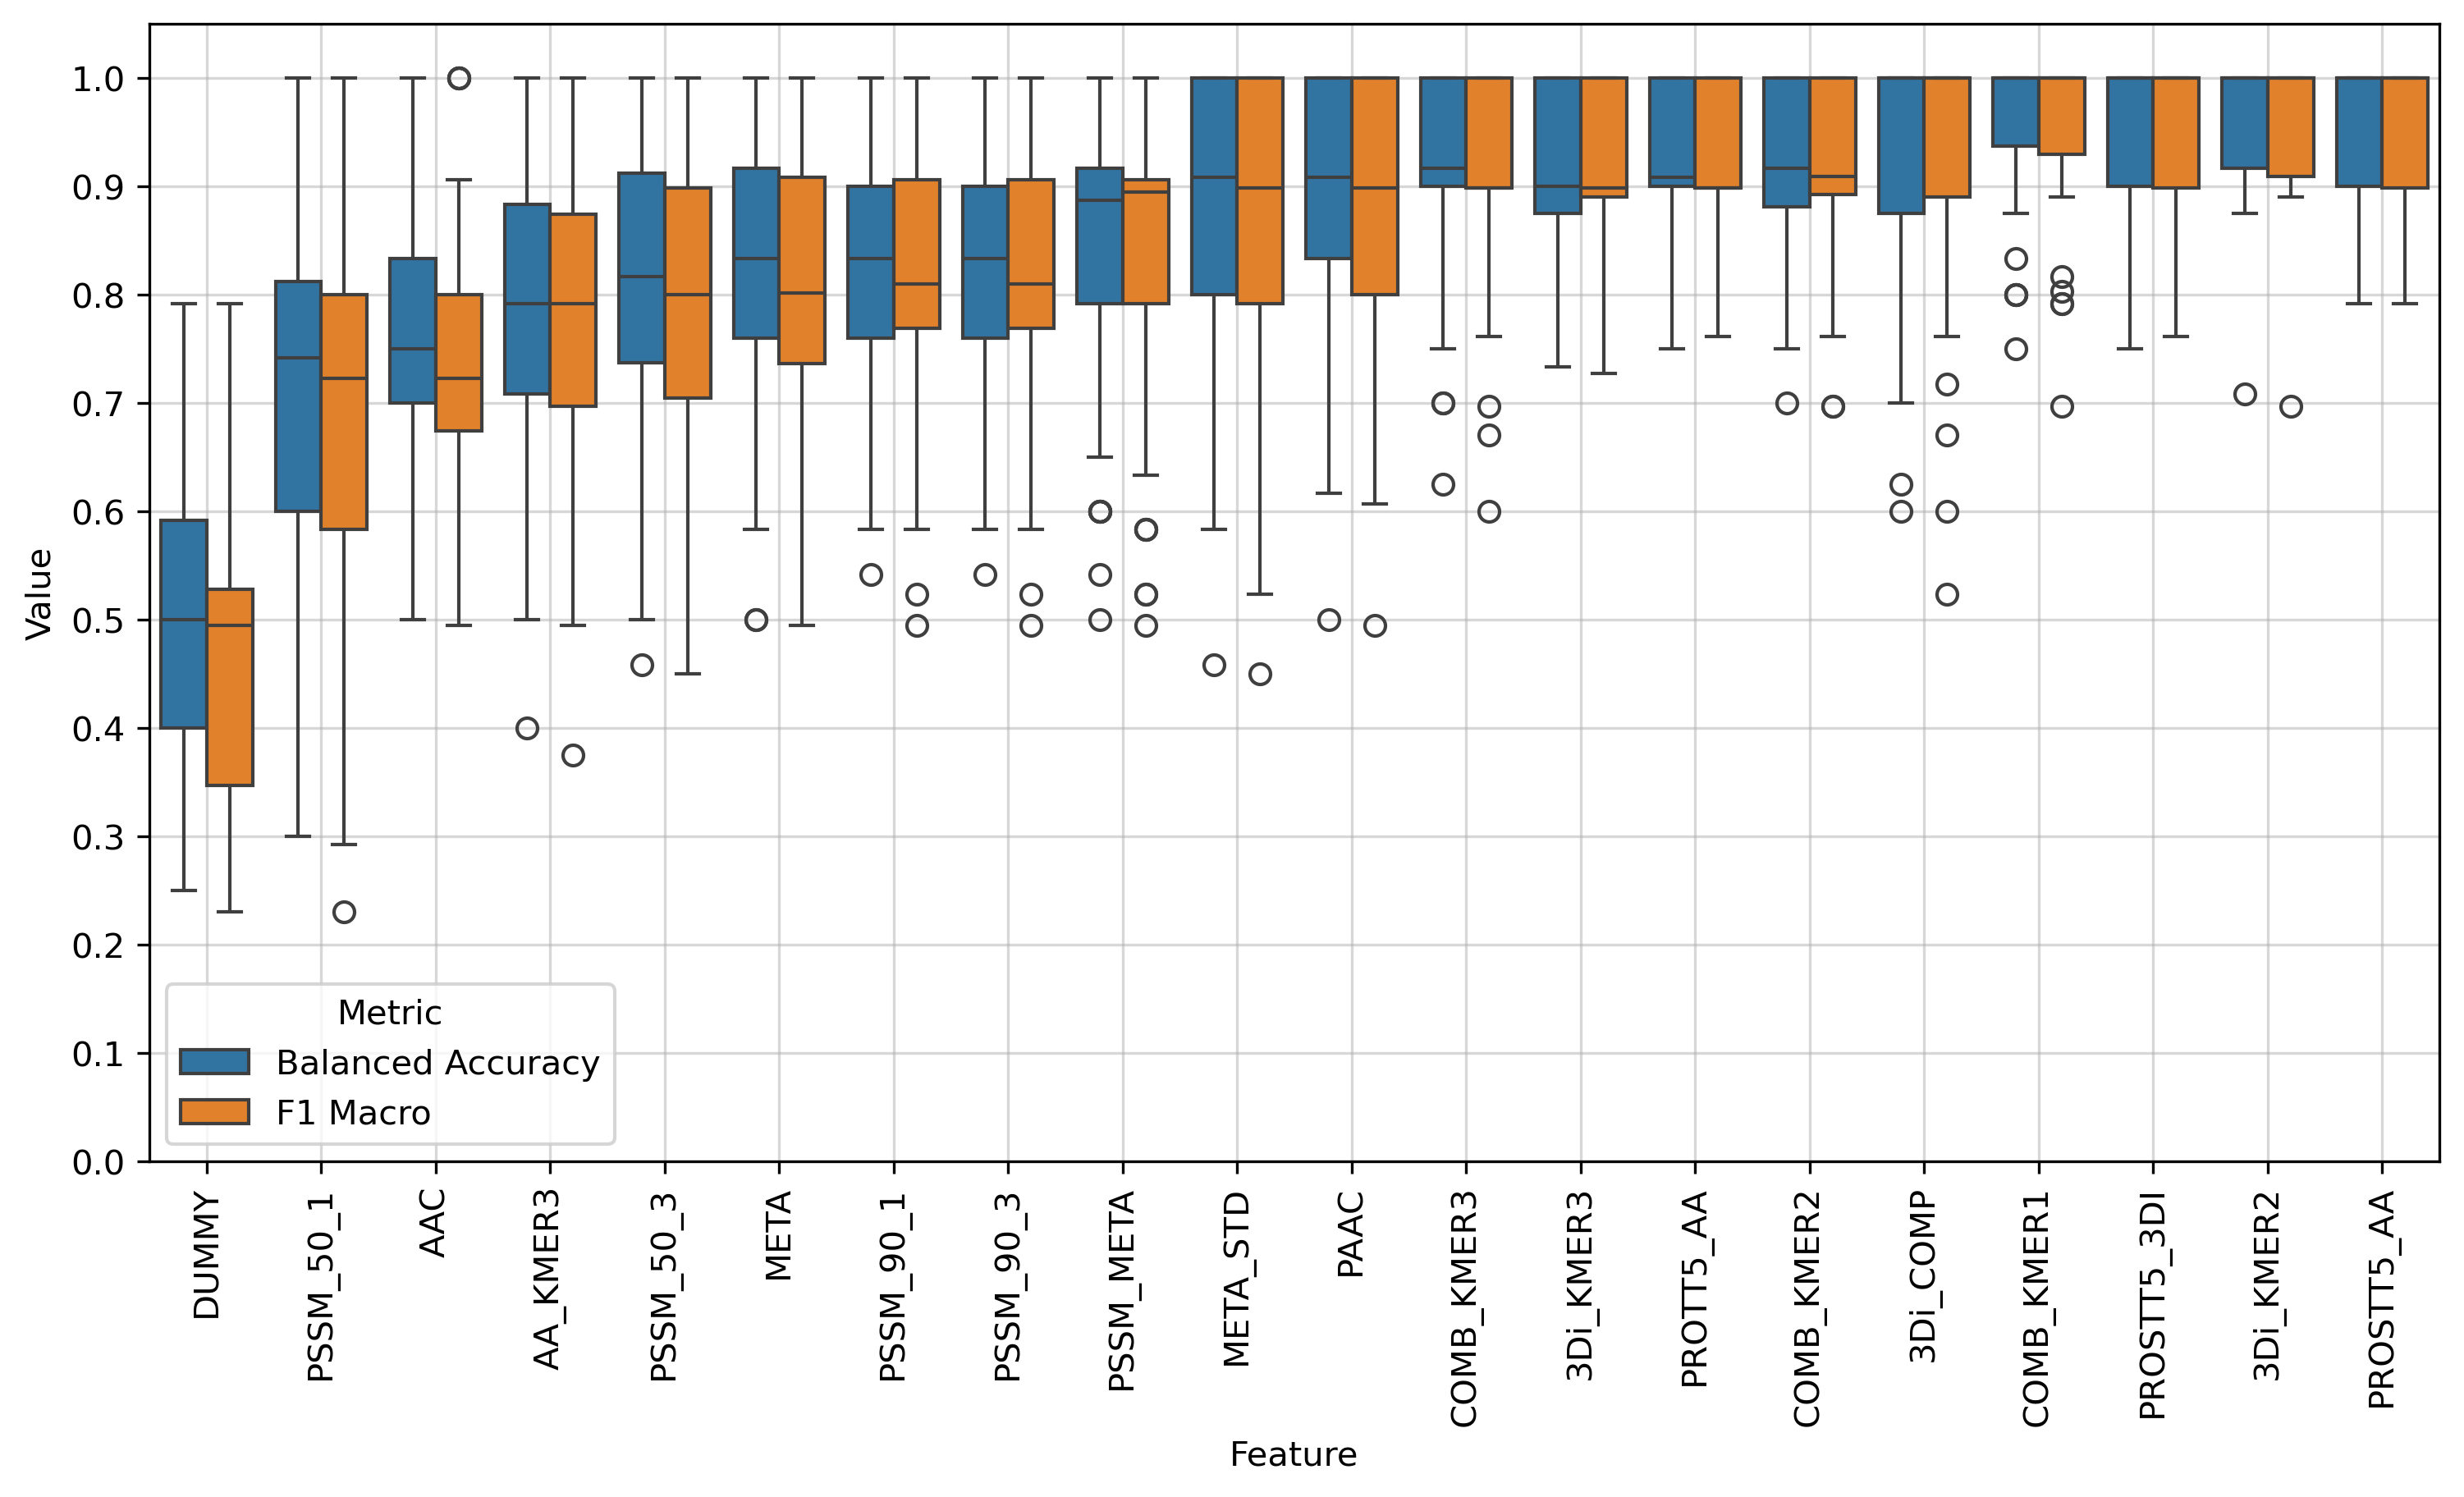

In [22]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include=["F1 Macro", "Balanced Accuracy"],
)